# ETL

## Import JSON File

In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = 'C://Users/mprud/OneDrive/Desktop/Rice Data Analytics Bootcamp/8thModule_ETL/Movies-ETL/Movies-ETL'
file_to_load = 'wikipedia-movies.json'

In [3]:
with open(f'{file_dir}/{file_to_load}', mode='r') as file:
          wiki_movies_raw = json.load(file)
len(wiki_movies_raw)

7311

## Use Index Slicing to QC Data

In [4]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [5]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [6]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

## Import Kaggle Movie Datasets

In [7]:
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [8]:
kaggle_metadata.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
6616,False,NaN,18000000,"[{'id': 10749, 'name': 'Romance'}]",NaN,10934,tt0328589,en,Under the Tuscan Sun,"After a rough divoce, Frances, a 35 year old b...",...,2003-04-30,58878723.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Life offers you a thousand chances ... all you...,Under the Tuscan Sun,False,6.4,178.0
40575,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 27, '...",NaN,81477,tt0063255,en,Mad Doctor of Blood Island,"A man who loves to travel, travels to an islan...",...,1969-09-18,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Waiting. No Appointment. No Escape!,Mad Doctor of Blood Island,False,4.1,5.0
25352,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,55689,tt0069753,it,Baba Yaga,Caroll Baker stars in this psychedelic shocker...,...,1973-09-20,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Baba Yaga,False,5.7,13.0
1551,False,NaN,50000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,2649,tt0119174,en,The Game,"In honor of his birthday, San Francisco banker...",...,1997-09-12,109423648.0,129.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,What do you get for the man who has everything?,The Game,False,7.5,1556.0
42592,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,443113,tt5509852,en,The Fourth Annual 'On Cinema' Oscar Special,"Tim showcases his band Dekkar, finds closure w...",...,2016-02-28,0.0,185.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Fourth Annual 'On Cinema' Oscar Special,False,0.0,0.0
1330,False,"{'id': 9329, 'name': 'Young Guns Collection', ...",20000000,"[{'id': 37, 'name': 'Western'}, {'id': 12, 'na...",NaN,9086,tt0100994,en,Young Guns II,"Only three of the original five ""young guns"" -...",...,1990-08-01,0.0,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Yoo-Hoo, I'll make ya famous!",Young Guns II,False,6.3,165.0
37067,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",NaN,20891,tt0145033,ru,Korolevstvo Krivykh Zerkal,Kingdom of Crooked Mirrors is a 1964 Soviet fa...,...,1963-05-05,0.0,80.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Kingdom of Crooked Mirrors,False,6.0,9.0
18753,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,99698,tt0325826,en,Mille Mois,"1981, Morocco. A village in the Atlas mountain...",...,2003-10-01,0.0,124.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,A Thousand Months,False,5.0,4.0
39114,False,NaN,0,"[{'id': 28, 'name': 'Action'}]",NaN,65192,tt0080151,en,Wu hu jiang,A pacifist village is beset by bandits in this...,...,1974-02-15,0.0,96.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,The Savage Five,False,5.6,5.0
40536,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,106394,tt0018873,en,The Fall of the House of Usher,"In a decaying castle surrounded by a dank, mir...",...,1928-12-31,0.0,13.0,[],Released,NaN,The Fall of the House of Usher,False,7.2,10.0


In [9]:
ratings.sample(10)

,userId,movieId,rating,timestamp
5020084,51708,2712,5.0,945027454
22933172,238171,162590,3.5,1486818840
1623868,16848,2028,5.0,1452396827
13513898,140487,2948,3.0,993502602
9792151,101036,2683,5.0,981056958
24748890,257294,998,2.0,974779343
6647644,68616,1678,4.0,1076807014
2793860,29031,1882,1.0,899645540
17552463,182140,1038,3.0,962390097
2251803,23364,743,3.0,1118833619


## Create a DataFrame

In [10]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [11]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [13]:
wiki_movies = [movie for movie in wiki_movies_raw
                   if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [14]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer', 'Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [15]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [16]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [17]:
# Determine which columns contain useful data
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [18]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Director', 'Distributor', 'Editor(s)',
       'Composer(s)', 'Producer(s)', 'Production company(s)', 'Writer(s)',
       'imdb_id'],
      dtype='object')

In [19]:
# Identify data types and potential problems
wiki_movies_df.dtypes

# Budget (numeric), Box Office (numeric), Running time (date time), and Release date (numeric) need different formats

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [20]:
box_office = wiki_movies_df['Box office'].dropna()
box_office.count()

5485

In [21]:
# Filtering with a named function
def is_not_a_string(x):
    return type(x) != str

In [22]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [23]:
# filtering with a lambda function
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [24]:
# Need to join() some of the list strings
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

## Regex Captures

In [25]:
# Create a Regex to capture box office strings
form_one = r"\$\d+\.?\d*\s*[mb]illion"
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [26]:
# Create a another Regex to capture more box office strings
form_two = r"\$\d{1,3}(?:,\d{3})+"
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [27]:
# store box office numbers that match regex captures
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [28]:
# Find values that don't match previous regex captures
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [29]:
# modify form_one and form_two regexs to capture more data
# add \s* to both regexs to allow for spaces between dollar sign and number
# modify form_one to allow for misspellings of "millon"
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
# add \. to form_two to allow for figures that use a "." instead of a "," separator.
# add a negative lookahead to reject numbers that have "[mb]illion" after a decimal
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [30]:
# Convert strings that provide a range of values
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [31]:
# Create a string extract of box_office_df for form_one and form_two regex
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [32]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s , flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6
        
        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9
        
        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
                                                                 

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)
        
        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [33]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', 
                                                      flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Box office', axis=1, inplace=True)
wiki_movies_df.sample(10)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
837,https://en.wikipedia.org/wiki/Swing_Kids_(1993...,1993,https://www.imdb.com/title/tt0108265/,Swing Kids,NaN,"[Robert Sean Leonard, Christian Bale, Frank Wh...",Jerzy Zielinski,"[March 5, 1993, (, 1993-03-05, )]",112 minutes,United States,...,$12 million,Thomas Carter,Buena Vista Pictures Distribution,Michael R. Miller,James Horner,"[Mark Gordon, John Bard Manulis]","[Hollywood Pictures, [1], Touchwood Pacific Pa...",Jonathan Marc Feldman,tt0108265,5600000.0
5099,https://en.wikipedia.org/wiki/The_Good_Guy_(film),2010,https://www.imdb.com/title/tt1247662/,The Good Guy,NaN,"[Alexis Bledel, Scott Porter, Bryan Greenberg,...",NaN,"[April 26, 2009, (, 2009-04-26, ), (, Tribeca,...",91 minutes,United States,...,"$3,200,000",Julio DePietro,Belladonna Productions Movie Studio,NaN,"[Kurt Oldman, and, Tomandandy]",NaN,NaN,Julio DePietro,tt1247662,100688.0
3890,https://en.wikipedia.org/wiki/Waiting..._(film),2005,https://www.imdb.com/title/tt0348333/,Waiting...,NaN,"[Ryan Reynolds, Anna Faris, Justin Long, David...",Matthew Irving,"[October 7, 2005, (, 2005-10-07, )]",94 minutes,United States,...,$3 million,Rob McKittrick,Lionsgate,"[Andy Blumenthal, David Finfer]",Adam Gorgoni,"[Robert O. Green, Jeff Balis, Jay Rifkin, Adam...","[Element Films, Eden Rock Media, Wisenheimer F...",Rob McKittrick,tt0348333,18600000.0
862,https://en.wikipedia.org/wiki/White_Wolves:_A_...,1993,https://www.imdb.com/title/tt0108559/,White Wolves: A Cry in the Wild II,NaN,"[Mark-Paul Gosselaar, Amy O'Neill, Ami Dolenz,...",Richard Michalak,"[February 3, 1993, (, 1993-02-03, ), [1]]",90 minutes,United States,...,NaN,Catherine Cyrans,Concorde Pictures,Glenn Garland,Terry Plumeri,Julie Corman,NaN,Catherine Cyran,tt0108559,NaN
4895,https://en.wikipedia.org/wiki/Horsemen_(film),2009,https://www.imdb.com/title/tt0892767/,Horsemen,NaN,"[Dennis Quaid, Zhang Ziyi, Lou Taylor Pucci, C...",Eric Broms,"[March 6, 2009, (, 2009-03-06, )]",91 minutes,United States,...,NaN,Jonas Åkerlund,Lionsgate,"[Jim May, Todd E. Miller]",Jan A.P. Kaczmarek,"[Michael Bay, Andrew Form, Brad Fuller]","[Mandate Pictures, Platinum Dunes, Radar Pictu...",David Callaham,tt0892767,2400000.0
4035,https://en.wikipedia.org/wiki/Expiration_Date_...,2006,https://www.imdb.com/title/tt0443501/,Expiration Date,NaN,"[Robert A. Guthrie, Jill Bennett, Sascha Knopf...",Bruce Worrall,2006,94 minutes,United States,...,NaN,Rick Stevenson,NaN,Mark Fulton,"[Tim Boyle, Bryon Rickeron, B.C. Smith]",John Forsen,Roadkill Productions LLC,"[Hamish Gunn, Rick Stevenson]",tt0443501,NaN
4827,https://en.wikipedia.org/wiki/Battle_for_Terra,2009,https://www.imdb.com/title/tt0858486/,Battle for Terra,NaN,"[Evan Rachel Wood, Brian Cox, James Garner, Ch...",Aristomenis Tsirbas,"[September 8, 2007, (, 2007-09-08, ), (, TIFF,...",85 minutes,United States,...,$4 million,Aristomenis Tsirbas,Lionsgate Films,J. Kathleen Gibson,Abel Korzeniowski,"[Ryan Colucci, Keith Calder, Dane Allan Smith,...","[Roadside Attractions, Snoot toons]",Aristomenis Tsirbas,tt0858486,6100000.0
2124,https://en.wikipedia.org/wiki/The_Adventures_o...,1998,https://www.imdb.com/title/tt0168449/,The Adventures of Sebastian Cole,NaN,"[Margaret Colin, Clark Gregg, Adrian Grenier, ...",John Foster,"[September 11, 1998, (, 1998-09-11, ), (, TIFF...",96 minutes,United States,...,NaN,Tod Williams,Paramount Classics,Alfonso Gonçalves,Elizabeth Swados,"[Karen Barber, Jasmine Kosovic]",Culpan Productions LLC,Tod Williams,tt0168449,100841.0
6881,https://en.wikipedia.org/wiki/Unsane_(film),2018,https://www.imdb.com/title/tt7153766/,Unsane,NaN,"[Claire Foy, Joshua Leonard, Jay Pharoah, Juno...","[Steven Soderbergh, (as Peter Andrews)]","[February 21, 2018, (, 2018-02-21, ), (, Berli...",98 minutes,United States,...,$1.5 million,Steven Soderbergh,"[Bleecker Street, 

In [34]:
# Create a 'budget' variable
budget = wiki_movies_df['Budget'].dropna()
# convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)
# Remove any values between a dollar sign and a hyphen
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)


In [35]:
# store budget numbers that match regex captures
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [36]:
# Remove citation references with the following code where:
    # "\[" tells it to look for an open bracket
    # '\d+' tells it to look for a number of any length greater than 0
    # "\]" tells it to look for a closing bracket
    # "\s*" tells it to look for any amount of trailing spaces
    # replaces them all with empty strings
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

c:\Users\mprud\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [37]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', 
                                                      flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)
wiki_movies_df.sample(10)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget
7050,https://en.wikipedia.org/wiki/Robin_Hood_(2018...,2018,https://www.imdb.com/title/tt4532826/,Robin Hood,NaN,"[Taron Egerton, Jamie Foxx, Ben Mendelsohn, Ev...",George Steel,"[November 21, 2018, (, 2018-11-21, ), (United ...",116 minutes,United States,...,Otto Bathurst,Lionsgate,"[Joe Hutshing, Chris Barwell]",Joseph Trapanese,"[Jennifer Davisson, Leonardo DiCaprio]","[Summit Entertainment, Appian Way Productions,...",Ben Chandler,tt4532826,84800000.0,100000000.0
552,https://en.wikipedia.org/wiki/Meatballs_4,1992,https://www.imdb.com/title/tt0104837/,Meatballs 4,NaN,"[Corey Feldman, Jack Nance, Sarah Douglas, Boj...",Vance Burberry,"[March 6, 1992, (, 1992-03-06, )]",84 min,United States,...,Bob Logan,Moviestore Entertainment,Peter H. Verity,Steve Hunter,"[Donald P. Borchers, Ken Halloway, Kris Krengel]",NaN,Bob Logan,tt0104837,NaN,NaN
3180,https://en.wikipedia.org/wiki/Sorority_Boys,2002,https://www.imdb.com/title/tt0279781/,Sorority Boys,NaN,"[Barry Watson, Michael Rosenbaum, Harland Will...",Michael D. O'Shea,"[March 22, 2002, (, 2002-03-22, )]",93 minutes,United States,...,Wallace Wolodarsky,Buena Vista Pictures,Richard Halsey,Mark Mothersbaugh,"[Larry Brezner, Walter Hamada, Michael Fottrell]",Touchstone Pictures,"[Joe Jarvis, Greg Coolidge]",tt0279781,12500000.0,12000000.0
740,https://en.wikipedia.org/wiki/Guilty_as_Sin,1993,https://www.imdb.com/title/tt0107057/,Guilty as Sin,NaN,"[Rebecca De Mornay, Don Johnson, Stephen Lang,...",Andrzej Bartkowiak,"[June 4, 1993, (, 1993-06-04, )]",107 minutes,United States,...,Sidney Lumet,Buena Vista Pictures,Evan A. Lottman,Howard Shore,Martin Ransohoff,Hollywood Pictures,Larry Cohen,tt0107057,22900000.0,12000000.0
5254,https://en.wikipedia.org/wiki/The_Beaver_(film),2011,https://www.imdb.com/title/tt1321860/,The Beaver,NaN,"[Mel Gibson, Jodie Foster, Anton Yelchin, Jenn...",Hagen Bogdanski,"[March 16, 2011, (, 2011-03-16, ), (, SXSW, ),...",91 minutes,"[United Arab Emirates, United States, [1]]",...,Jodie Foster,Summit Entertainment,Lynzee Klingman,Marcelo Zarvos,"[Steve Golin, Keith Redmon, Ann Ruark]","[Participant Media, Anonymous Content, Imagena...",Kyle Killen,tt1321860,7300000.0,21000000.0
7008,"https://en.wikipedia.org/wiki/Love,_Gilda",2018,https://www.imdb.com/title/tt5424228/,"Love, Gilda",NaN,"[Gilda Radner, Amy Poehler, Melissa McCarthy, ...","[Rob Featherstone, Nick Higgins]","[April 18, 2018, (, 2018-04-18, ), (, Tribeca ...",88 minutes,"[United States, Canada]",...,Lisa Dapolito,"[Magnolia Pictures, (USA) (theatrical), CNN Fi...","[Anne Alvergue, David Cohen]",Miriam Cutler,"[Bronwyn Berry, Lisa Dapolito, Meryl Goldsmith...","[3 Faces Films, Motto Pictures]",NaN,tt5424228,616849.0,NaN
2976,https://en.wikipedia.org/wiki/Sweet_November_(...,2001,https://www.imdb.com/title/tt0230838/,Sweet November,"[Sweet November, by, Herman Raucher]","[Keanu Reeves, Charlize Theron]",Edward Lachman,"[February 16, 2001, (, 2001-02-16, )]",120 minutes,United States,...,Pat O'Connor,Warner Bros.,Anne V. Coates,Christopher Young,"[Elliott Kastner, Steven Reuther, Deborah Aal,...",Bel Air Entertainment,"[Paul Yurick, Kurt Voelker]",tt0230838,65800000.0,40000000.0
1064,https://en.wikipedia.org/wiki/Puppet_Master_5:...,1994,https://www.imdb.com/title/tt0110916/,Puppet Master 5: The Final Chapter,NaN,"[Guy Rolfe, Gordon Currie, Chandra West, Ian O...",Adolfo Bartoli,"[September 21, 1994, (, 1994-09-21, )]",82 minutes,United States,...,Jeff Burr,"[Full Moon Entertainment, Paramount Pictures]",Margeret-Anne Smith,Richard Band,"[Charles Band, Keith S. Payson]",NaN,"[Douglas Aarniokoski, Steven E. Carr, Jo Duffy...",tt0110916,NaN,NaN
5691,https://en.wikipedia.org/wiki/Smashed_(film),2012,https://www.imdb.com/title/tt2063781/,Smashed,NaN,"[Mary Elizabeth Winstead, Aaron Paul, Nick Off.

In [38]:
# Parse 'Release Date'
    #create a variable to hold non-null values of 'Release Date', converting lists to strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [39]:
# Forms to parse:
# 1. Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
# 2.Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
date_form_two = r'\d{4}.[01]\d.[0123]\d'
# 3. Full month name, four-digit year (i.e., January 2000)
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
#  4. Four-digit year
date_form_four = r'\d{4}'

In [40]:
# Parse different Release Date forms
    # use the built-in to_datetime() method in Pandas. set the infer_datetime_format option to True. 
    # The date formats we've targeted are among those that the to_datetime() function can recognize
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|\
    {date_form_two}|\
        {date_form_three}|\
            {date_form_four})')[0], infer_datetime_format=True)
wiki_movies_df.sample(10)




,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date
623,https://en.wikipedia.org/wiki/Simple_Men,1992,https://www.imdb.com/title/tt0105411/,Simple Men,NaN,Robert John Burke,Michael Spiller,"[September 15, 1992, (, 1992-09-15, )]",105 minutes,United States,...,Fine Line Features,Steve Hamilton,Hal Hartley,Jerome Brownstein,NaN,Hal Hartley,tt0105411,NaN,NaN,1992-09-15
6546,https://en.wikipedia.org/wiki/Kubo_and_the_Two...,2016,https://www.imdb.com/title/tt4302938/,Kubo and the Two Strings,NaN,"[Charlize Theron, Art Parkinson, Ralph Fiennes...",Frank Passingham,"[August 13, 2016, (, 2016-08-13, ), (, MIFF, )...",102 minutes,United States,...,Focus Features,Christopher Murrie,Dario Marianelli,"[Arianne Sutner, Travis Knight]",Laika,"[Shannon Tindle, Marc Haimes]",tt4302938,77500000.0,60000000.0,2016-08-13
4364,https://en.wikipedia.org/wiki/The_Comebacks,2007,https://www.imdb.com/title/tt0790804/,The Comebacks,NaN,"[David Koechner, Carl Weathers, Melora Hardin,...",Anthony B. Richmond,"[October 19, 2007, (, 2007-10-19, )]","[84 minutes, 107 minutes (unrated version)]",United States,...,Fox Atomic,Alan Edward Bell,Christopher Lennertz,"[Adam F. Goldberg, Robert L. Levy, Andrew Pana...",Tapestry Films,"[John Aboud, Michael Colton, Adam Jay Epstein,...",tt0790804,13539154.0,20000000.0,2007-10-19
1928,https://en.wikipedia.org/wiki/Hugo_Pool,1997,https://www.imdb.com/title/tt0119327/,Hugo Pool,NaN,"[Patrick Dempsey, Robert Downey Jr., Richard L...",Joseph Montgomery,"[December 12, 1997, (, 1997-12-12, )]",92 minutes,United States,...,Northern Arts Entertainment,Joe D'Augustine,Danilo Pérez,Barbara Ligeti,"[BMG Independents, Nomadic Pictures]","[Robert Downey Sr., Laura Downey]",tt0119327,13330.0,NaN,1997-12-12
3187,https://en.wikipedia.org/wiki/Star_Trek_Nemesis,2002,https://www.imdb.com/title/tt0253754/,Star Trek: Nemesis,"[Star Trek, by, Gene Roddenberry]","[Patrick Stewart, Jonathan Frakes, Brent Spine...",Jeffrey L. Kimball,"[December 13, 2002, (, 2002-12-13, )]",116 minutes,United States,...,Paramount Pictures,Dallas Puett,Jerry Goldsmith,Rick Berman,NaN,"[John Logan, Rick Berman, Brent Spiner]",tt0253754,67300000.0,60000000.0,2002-12-13
2056,https://en.wikipedia.org/wiki/The_6th_Man,1997,https://www.imdb.com/title/tt0120142/,The 6th Man,NaN,"[Marlon Wayans, Kadeem Hardison, Kevin Dunn, M...",Mike Ozier,"[March 28, 1997, (, 1997-03-28, )]",108 minutes,United States,...,Buena Vista Pictures,Eric A. Sears,Marcus Miller,David Hoberman,"[Touchstone Pictures, Mandeville Films]","[Christopher Reed, Cynthia Carle]",tt0120142,14772788.0,11000000.0,1997-03-28
966,https://en.wikipedia.org/wiki/Greedy_(film),1994,https://www.imdb.com/title/tt0109936/,Greedy,NaN,"[Michael J. Fox, Kirk Douglas, Nancy Travis, O...",Gabriel Beristain,"[March 4, 1994, (, 1994-03-04, )]",113 minutes,United States,...,Universal Pictures,Tony Lombardo,Randy Edelman,Brian Grazer,Imagine Entertainment,"[Lowell Ganz, Babaloo Mandel]",tt0109936,13137484.0,23000000.0,1994-03-04
3321,https://en.wikipedia.org/wiki/House_of_1000_Co...,2003,https://www.imdb.com/title/tt0251736/,House of 1000 Corpses,NaN,"[Sid Haig, Bill Moseley, Sheri Moon, Karen Bla...","[Alex Poppas, Tom Richmond]","[April 11, 2003, (, 2003-04-11, )]",88 minutes,United States,...,Lionsgate Films,"[Kathryn Himoff, Robert K. Lambert, Sean K. La...","[Rob Zombie, Scott Humphrey]",Andy Gould,Goodrights,Rob Zombie,tt0251736,16800000.0,7000000.0,2003-04-11
1608,https://en.wikipedia.org/wiki/In_Cold_Blood_(m...,1996,https://www.imdb.com/title/tt0116619/,In Cold Blood,"[In Cold Blood, by, Truman Capote]","[Anthony Edwards, Eric Roberts, Sam Neill]",Peter F. Woeste,"[November 24, 1996, (, 1996-11-24, )]",240 minutes,United States,...,Columbia Broadcasting System,Michael Ornstein,Hummie Mann,Tom Rowe,Pacific Motion Pictures Corporation,Benedict Fitzgerald,tt

In [41]:
# Parse Running Time
    # make a variable that holds non-null values and converts lists to strings
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
# Find out how many data entries match a simple '### minutes' regex
print(running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum())
running_time

6528


0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [42]:
# Look at what the non-matches for Running Time regex look like
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [43]:
# adjust regex to allow for other forms of 'minutes' in search (to include some of the non-matches above)
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()


6877

In [44]:
# Re-look at non-matches
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [45]:
# Add additional regex pattern to capture 'Running time' that has an '# hours # minutes' format
# # With our new pattern, it's time to extract values. We only want to extract digits, and we want to allow for both possible patterns. 
# Therefore, we'll add capture groups around the \d instances as well as add an alternating character.

running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [46]:
# this new DataFrame is all strings, we'll need to convert them to numeric values. 
# Because we may have captured empty strings, we'll use the to_numeric() method and set the errors argument to 'coerce'. 
# Coercing the errors will turn the empty strings into Not a Number (NaN), then we can use fillna() to change all the NaNs to zeros.
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [47]:
# Now we can apply a function that will convert the hour capture groups and minute capture groups to minutes if the pure minutes capture group is zero, 
# and save the output to wiki_movies_df.
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
# Drop running time from DataFrame
wiki_movies_df.drop('Running time', axis=1, inplace=True)
wiki_movies_df

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Country,Language,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0,1990-07-11,102.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,English,...,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,6000000.0,1990-05-17,114.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,"[English, Lao]",...,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,35000000.0,1990-08-10,113.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,English,...,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,12000000.0,1990-12-25,106.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,English,...,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,25000000.0,1990-12-19,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",United States,English,...,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919,41900000.0,42000000.0,2018-12-25,90.0
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",United States,English,...,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538,76100000.0,60000000.0,2018-12-11,132.0
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",United States,English,...,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788,38400000.0,20000000.0,2018-11-08,120.0
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",Julie Kirkwood,"[August 31, 2018, (, 2018-08-31, ), (, Telluri...",United States,English,...,Plummy Tucker,Theodore Shapiro,"[Fred Berger, 

### Metadata Parsing

In [48]:
# keep rows where the adult column is False, and then drop the adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')


In [49]:
# keep data where 'video' column is True
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'


In [50]:
# For the numeric columns ('budget', 'id', 'popularity'), we can just use the to_numeric() method from Pandas. 
# Make sure the errors= argument is set to 'raise', so we'll know if there's any data that can't be converted to numbers.
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')


In [51]:
# Convert 'Release date' to datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


### Reasonability Checks on Ratings Data

In [52]:
# Check reasonability of Ratings data
ratings.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


c:\Users\mprud\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [53]:
# Specify that timestamp is unix time (the default) and the unit is seconds (s)
print(pd.to_datetime(ratings['timestamp'], unit='s'))
# Result looks reasonable, so assign it to 'timestamp' column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')


0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]


count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

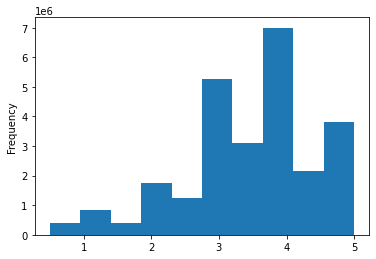

In [54]:
# Make a histogram of the ratings distribution, then use the describe() method to look at stats on central tendency and spread
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()


### Merge Databases


In [55]:
# Merge Kaggle and Wiki databases on 'imdb_id.  Since we only want data shared by both tables, we want an Inner Join (which is the default)
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])
movies_df.sample(5)


,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
684,https://en.wikipedia.org/wiki/Only_the_Strong_...,1993,https://www.imdb.com/title/tt0107750/,Only the Strong,NaN,"[Mark Dacascos, Stacey Travis, Paco Christian ...",NaN,"[August 27, 1993, (, 1993-08-27, )]",NaN,English,...,1993-08-27,"3,283,371.00",99.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The ultimate martial art.,Only the Strong,False,6.80,30.00
5023,https://en.wikipedia.org/wiki/The_Master_(2012...,2012,https://www.imdb.com/title/tt1560747/,The Master,NaN,"[Joaquin Phoenix, Philip Seymour Hoffman, Amy ...",Mihai Mălaimare Jr.,"[September 1, 2012, (, 2012-09-01, ), (, VFF, ...",United States,English,...,2012-09-07,"28,258,060.00",137.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every Man Needs a Guide,The Master,False,7.00,720.00
1907,https://en.wikipedia.org/wiki/Mighty_Joe_Young...,1998,https://www.imdb.com/title/tt0120751/,Mighty Joe Young,"[Mighty Joe Young, by, Merian C. Cooper, Ruth ...","[Bill Paxton, Charlize Theron, Rade Šerbedžija...","[Donald Peterman, Oliver Wood]","[December 25, 1998, (, 1998-12-25, )]",United States,English,...,1998-12-25,0.00,114.00,"[{'iso_639_1': 'sw', 'name': 'Kiswahili'}, {'i...",Released,Survival is an instinct.,Mighty Joe Young,False,5.90,208.00
4385,https://en.wikipedia.org/wiki/Not_Easily_Broken,2009,https://www.imdb.com/title/tt0795438/,Not Easily Broken,"[Not Easily Broken, by T. D. Jakes]","[Morris Chestnut, Taraji P. Henson, Maeve Quin...",Geary McLeod,"[January 9, 2009, (, 2009-01-09, )]",United States,English,...,2009-01-09,0.00,99.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Not Easily Broken,False,6.30,10.00
72,https://en.wikipedia.org/wiki/Green_Card_(film),1990,https://www.imdb.com/title/tt0099699/,Green Card,NaN,"[Gérard Depardieu, Andie MacDowell]",Geoffrey Simpson,"[25 December 1990, (, 1990-12-25, ), (United S...","[United States, Australia, France]",English,...,1990-12-23,"29,888,235.00",108.00,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,"The story of two people who got married, met a...",Green Card,False,5.90,97.00


#### Data Decision Table

In [56]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             DROP WIKIPEDIA
# running_time             runtime                  KEEP KAGGLE; fill in 0s with Wikipedia data
# budget_wiki              budget_kaggle            KEEP KAGGLE; fill in 0s with Wikipedia data
# box_office               revenue                  KEEP KAGGLE; fill in 0s with Wikipedia data
# release_date_wiki        release_date_kaggle      DROP WIKIPEDIA
# Language                 original_language        DROP WIKIPEDIA
# Production company(s)    production_companies     DROP WIKIPEDIA


##### Title

In [57]:
# Investigate where Kaggle and Wiki titles do not match
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]


,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [58]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]


,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


##### Running Time

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

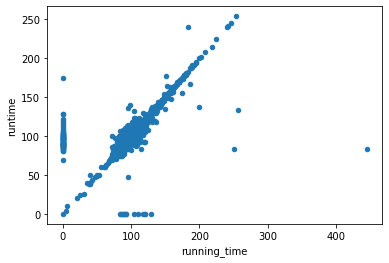

In [59]:
# Compare Wiki 'running_time' to Kaggle 'runtime'.  If there was a perfect match, it should appear as a straight line
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

# scatter shows that there are more missing entries in Wiki (more 0 values on y-axis), so keep the Kaggle datapoints


##### Budget

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

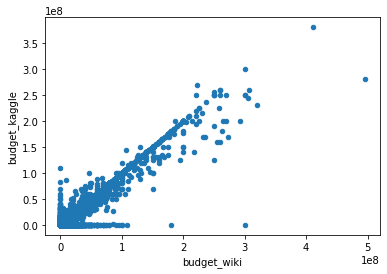

In [60]:
# plot Kaggle and Wikipedia budget against one another to decide which one to keep
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

# wikipedia data appears to have more outliers, but Kaggle has more empty values: Use Kaggle as base and fill in with Wiki.

##### Box Office

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

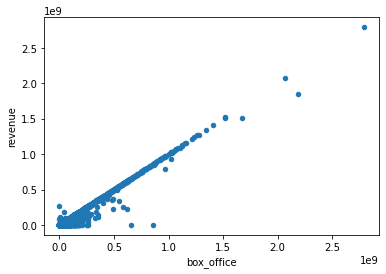

In [61]:
# Compare 'box_office' (Wiki) to 'revenue' (Kaggle)
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

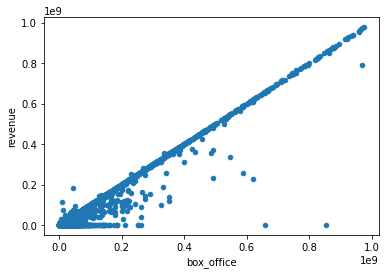

In [62]:
# Zoom in on majority of data to investigate the relationship
movies_df.fillna(0)[movies_df['box_office']< 10**9].plot(x='box_office', y='revenue', kind='scatter')

# Plot shows that there are less outliers in 'revenue' (Kaggle) dataset, but there are some 0 values that could be filled in by 'box_office' (Wiki)

##### Release Date

<AxesSubplot:xlabel='release_date_wiki'>

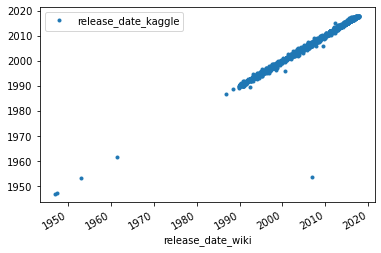

In [63]:
# For release_date_wiki and release_date_kaggle, we can't directly make a scatter plot, because the scatter plot only works on numeric data. 
# However, there's a tricky workaround that we can use. 
# We'll use the regular line plot (which can plot date data), and change the style to only put dots by adding style='.' to the plot() method
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [64]:
# Investigate outlier point near 2006
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",United States,English,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


In [65]:
# 'The Holiday' from Wiki database got merged with 'From Here to Eternity' from Kaggle database. Get index in order to drop row from DataFrame
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [66]:
# Now use code to drop row from DataFrame
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [67]:
# See if there are any null values
print(movies_df[movies_df['release_date_wiki'].isnull()])
print(movies_df[movies_df['release_date_kaggle'].isnull()])

# Kaggle doesn't have any null values, so it is a better source

                                                    url  year  \
29        https://en.wikipedia.org/wiki/China_O%27Brien  1990   
33    https://en.wikipedia.org/wiki/Crash_and_Burn_(...  1990   
38    https://en.wikipedia.org/wiki/The_Dark_Side_of...  1990   
53      https://en.wikipedia.org/wiki/Faces_of_Death_IV  1990   
61          https://en.wikipedia.org/wiki/Frankenhooker  1990   
...                                                 ...   ...   
6022  https://en.wikipedia.org/wiki/Dunkirk_(2017_film)  2017   
6023  https://en.wikipedia.org/wiki/Valerian_and_the...  2017   
6046      https://en.wikipedia.org/wiki/Stratton_(film)  2018   
6047    https://en.wikipedia.org/wiki/A_Fantastic_Woman  2018   
6049      https://en.wikipedia.org/wiki/Loveless_(film)  2018   

                                  imdb_link  \
29    https://www.imdb.com/title/tt0099260/   
33    https://www.imdb.com/title/tt0099313/   
38    https://www.imdb.com/title/tt0099364/   
53    https://www.imdb.com/titl

##### Language

In [68]:
# Check to see what the value ranges and counts are for 'Language'. first need to change Wiki 'Language' into a tuple so it can be counted
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)


English                        5479
NaN                             134
(English, Spanish)               68
(English, French)                35
(English, Japanese)              25
                               ... 
(English /, Zulu)                 1
(English, Hebrew, Spanish)        1
(English, Japanese, French)       1
(English, Spanish, Apache)        1
Russian                           1
Name: Language, Length: 198, dtype: int64

In [69]:
# Kaggle 'Language is not in a tuple, so it doesn not need to be converted
movies_df['original_language'].value_counts(dropna=False)

#Wikipedia has more information about multiple languages, but Kaggle data is more consistent.  Will keep Kaggle

en    5987
fr      16
es      10
it       8
de       6
ja       4
pt       4
zh       4
da       2
hi       2
sv       1
ko       1
ab       1
tr       1
he       1
ar       1
cn       1
ru       1
Name: original_language, dtype: int64

##### Production Company

In [70]:
# Investigate Wiki and Kaggle Production company information (in that order)
movies_df[['Production company(s)','production_companies']]

# Kaggle seems to be better(?)

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


## Pull It All Together

In [71]:
# First, we'll drop the title_wiki, release_date_wiki, Language, and Production company(s) columns. (See Data Decision Table)
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)


In [72]:
# Make a function that fills in missing data for a column pair and then drops the redundant column
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [73]:
# run the function for the three column pairs that we decided to fill in zeros
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Release date,Country,Director,Distributor,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,20th Century Fox,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,Avenue Pictures,...,1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,TriStar Pictures,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,Orion Pictures,...,1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,John Cornell,Paramount Pictures,...,1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,"[Participant Media (Chile), Piffl Medien (Germ...",...,2017-04-06,"3,700,000.00",104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,Brian Crano,Good Deed Entertainment,...,2017-04-22,NaN,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,"[Sony Pictures Releasing, (Russia), [1]]",...,2017-06-01,"4,800,000.00",128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,Aaron Katz,Neon,...,2017-03-12,"200,340.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemin

In [74]:
# check that there aren't any columns with only one value, since that doesn't really provide any information. 
# First, convert lists to tuples for value_counts() to work.
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [75]:
#Investigate 'video' column, to see if it provides any useful information
movies_df['video'].value_counts(dropna=False)
#NOPE!

False    6051
Name: video, dtype: int64

In [76]:
# Drop 'video' column
movies_df.drop(columns='video', inplace=True)



In [77]:
# Reorder columns
movies_df = movies_df.loc[:,['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]


In [78]:
# Rename columns for consistency
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

### Transform and Merge 'Rating' Data

In [79]:
# First use groupby on 'movieId' and 'rating' column and make value counts
rating_counts = ratings.groupby(['movieId', 'rating'], as_index=False).count()
rating_counts

,movieId,rating,userId,timestamp
0,1,0.50,441,441
1,1,1.00,804,804
2,1,1.50,438,438
3,1,2.00,2083,2083
4,1,2.50,1584,1584
...,...,...,...,...
239376,176267,4.00,1,1
239377,176269,3.50,1,1
239378,176271,5.00,1,1
239379,176273,1.00,1,1


In [81]:
# rename the "userId" column to "count."
rating_counts = rating_counts.rename({'userId':'count'}, axis=1)
rating_counts

,movieId,rating,count,timestamp
0,1,0.50,441,441
1,1,1.00,804,804
2,1,1.50,438,438
3,1,2.00,2083,2083
4,1,2.50,1584,1584
...,...,...,...,...
239376,176267,4.00,1,1
239377,176269,3.50,1,1
239378,176271,5.00,1,1
239379,176273,1.00,1,1


In [82]:
# pivot the data
rating_counts.pivot(index='movieId', columns='rating', values='count')

rating,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"
2,263.00,797.00,525.00,"2,479.00","1,810.00","8,510.00","2,916.00","6,035.00",690.00,"2,035.00"
3,169.00,772.00,233.00,"1,665.00",616.00,"6,213.00",759.00,"3,433.00",154.00,"1,483.00"
4,47.00,351.00,31.00,496.00,77.00,"1,133.00",66.00,557.00,12.00,211.00
5,237.00,785.00,270.00,"1,716.00",664.00,"6,608.00",723.00,"2,959.00",166.00,"1,130.00"
...,...,...,...,...,...,...,...,...,...,...
176267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
176269,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
176271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [83]:
# change column names to make it clear that they are ratings
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

### Merge movie_df with rating_counts

In [84]:
# We want to take all the values from the movies_df and merge them with their corresponding rating_counts
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')